In [30]:
import pandas as pd
from pathlib import Path
import numpy as np
from PIL import Image
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval, LogStretch, ImageNormalize, simple_norm
import os
import sys

In [31]:
CACHE_DIR = Path("JWST_NIRCam_Triple_Filter") / "cache"

In [32]:
df_F200 = pd.read_parquet(CACHE_DIR / "F200W_products.parquet")
df_F277 = pd.read_parquet(CACHE_DIR / "F277W_products.parquet")
df_F444 = pd.read_parquet(CACHE_DIR / "F444W_products.parquet")

In [33]:
print(df_F200.columns.tolist())

['obsID', 'obs_collection', 'dataproduct_type', 'obs_id', 'description', 'type', 'dataURI', 'productType', 'productGroupDescription', 'productSubGroupDescription', 'productDocumentationURL', 'project', 'prvversion', 'proposal_id', 'productFilename', 'size', 'parent_obsid', 'dataRights', 'calib_level', 'filters', 's_ra', 's_dec']


In [34]:
df_F200.head(10)

,obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,...,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters,s_ra,s_dec
0,94086004,JWST,image,jw01537-o015_t002_nircam_clear-f200w-sub160,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01537-o015_t002_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1537,jw01537-o015_t002_nircam_clear-f200w-sub160_i2...,13705920,94086004,PUBLIC,3,F200W,88.115586,15.885917
1,95603170,JWST,image,jw01179-o011_t003_nircam_clear-f200w-sub160p,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01179-o011_t003_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1179,jw01179-o011_t003_nircam_clear-f200w-sub160p_i...,1097280,95603170,PUBLIC,3,F200W,82.614728,25.332353
2,97913370,JWST,image,jw02078-o010_t014_nircam_clear-f200w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw02078-o010_t014_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.2,2078,jw02078-o010_t014_nircam_clear-f200w_i2d.fits,1572707520,97913370,PUBLIC,3,F200W,106.609912,29.351517
3,102598637,JWST,image,jw02516-o004_t004_nircam_clear-f200w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw02516-o004_t004_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,2516,jw02516-o004_t004_nircam_clear-f200w_i2d.fits,574459200,102598637,PUBLIC,3,F200W,53.217094,-27.529197
4,113916790,JWST,image,jw01181-o003_t007_nircam_clear-f200w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01181-o003_t007_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1181,jw01181-o003_t007_nircam_clear-f200w_i2d.fits,1580034240,113916790,PUBLIC,3,F200W,189.046548,62.261006
5,130482606,JWST,image,jw02078-o017_t021_nircam_clear-f200w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw02078-o017_t021_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.2,2078,jw02078-o017_t021_nircam_clear-f200w_i2d.fits,1574323200,130482606,PUBLIC,3,F200W,164.532167,29.511583
6,132341361,JWST,image,jw01243-o008_t003_nircam_clear-f200w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01243-o008_t003_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.2,1243,jw01243-o008_t003_nircam_clear-f200w_i2d.fits,1691974080,132341361,PUBLIC,3,F200W,157.612879,5.415306
7,144115323,JWST,image,jw01243-o005_t005_nircam_clear-f200w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01243-o005_t005_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.2,1243,jw01243-o005_t005_nircam_clear-f200w_i2d.fits,4230449280,144115323,PUBLIC,3,F200W,159.225792,-2.543872
8,152008743,JWST,image,jw01276-o002_t002_nircam_clear-f200w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01276-o002_t002_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1276,jw01276-o002_t002_nircam_clear-f200w_i2d.fits,851495040,152008743,PUBLIC,3,F200W,121.747197,-66.309317
9,163493127,JWST,image,jw01837-o033_t037_nircam_clear-f200w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01837-o033_t037_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1837,jw01837-o033_t037_nircam_clear-f200w_i2d.fits,1221782400,163493127,PUBLIC,3,F200W,34.443832,-5.270675


In [35]:
df_F200[["productFilename", "dataURI", "obsID", "s_ra", "s_dec"]].head()

,productFilename,dataURI,obsID,s_ra,s_dec
0,jw01537-o015_t002_nircam_clear-f200w-sub160_i2...,mast:JWST/product/jw01537-o015_t002_nircam_cle...,94086004,88.115586,15.885917
1,jw01179-o011_t003_nircam_clear-f200w-sub160p_i...,mast:JWST/product/jw01179-o011_t003_nircam_cle...,95603170,82.614728,25.332353
2,jw02078-o010_t014_nircam_clear-f200w_i2d.fits,mast:JWST/product/jw02078-o010_t014_nircam_cle...,97913370,106.609912,29.351517
3,jw02516-o004_t004_nircam_clear-f200w_i2d.fits,mast:JWST/product/jw02516-o004_t004_nircam_cle...,102598637,53.217094,-27.529197
4,jw01181-o003_t007_nircam_clear-f200w_i2d.fits,mast:JWST/product/jw01181-o003_t007_nircam_cle...,113916790,189.046548,62.261006


In [36]:
df_F277.head(10)

,obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,...,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters,s_ra,s_dec
0,71751761,JWST,image,jw01160-o023_t013_nircam_clear-f277w-sub160,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01160-o023_t013_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.10.1,1160,jw01160-o023_t013_nircam_clear-f277w-sub160_i2...,964800,71751761,PUBLIC,3,F277W,269.896674,65.972542
1,75076080,JWST,image,jw01067-o304_t010_nircam_clear-f277w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01067-o304_t010_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1067,jw01067-o304_t010_nircam_clear-f277w_i2d.fits,123105600,75076080,PUBLIC,3,F277W,241.360895,29.699431
2,83256477,JWST,image,jw01067-o122_t010_nircam_clear-f277w-sub160,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01067-o122_t010_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1067,jw01067-o122_t010_nircam_clear-f277w-sub160_i2...,912960,83256477,PUBLIC,3,F277W,241.360895,29.699431
3,85767298,JWST,image,jw01074-o003_t014_nircam_clear-f277w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01074-o003_t014_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1074,jw01074-o003_t014_nircam_clear-f277w_i2d.fits,531817920,85767298,PUBLIC,3,F277W,80.559713,-69.500167
4,99618345,JWST,image,jw01538-o046_t024_nircam_clear-f277w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01538-o046_t024_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1538,jw01538-o046_t024_nircam_clear-f277w_i2d.fits,519935040,99618345,PUBLIC,3,F277W,120.037752,-10.786950
5,104983716,JWST,image,jw01355-o003_t012_nircam_clear-f277w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01355-o003_t012_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1355,jw01355-o003_t012_nircam_clear-f277w_i2d.fits,331084800,104983716,PUBLIC,3,F277W,186.713733,21.872214
6,114614979,JWST,image,jw01181-c1009_t008_nircam_clear-f277w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01181-c1009_t008_nircam_cl...,SCIENCE,Minimum Recommended Products,I2D,...,1.8.2,1181,jw01181-c1009_t008_nircam_clear-f277w_i2d.fits,837558720,114614979,PUBLIC,3,F277W,189.133863,62.266661
7,126650252,JWST,image,jw01727-o102_t102_nircam_clear-f277w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01727-o102_t102_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.20.2,1727,jw01727-o102_t102_nircam_clear-f277w_i2d.fits,349079040,126650252,PUBLIC,3,F277W,150.172211,2.035739
8,126650651,JWST,image,jw01727-o104_t110_nircam_clear-f277w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01727-o104_t110_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1727,jw01727-o104_t110_nircam_clear-f277w_i2d.fits,349032960,126650651,PUBLIC,3,F277W,150.206360,2.023317
9,126650993,JWST,image,jw01727-o117_t015_nircam_clear-f277w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01727-o117_t015_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.20.2,1727,jw01727-o117_t015_nircam_clear-f277w_i2d.fits,349079040,126650993,PUBLIC,3,F277W,149.763519,2.081803


In [37]:
df_F277[["productFilename", "dataURI", "obsID", "s_ra", "s_dec"]].head()

,productFilename,dataURI,obsID,s_ra,s_dec
0,jw01160-o023_t013_nircam_clear-f277w-sub160_i2...,mast:JWST/product/jw01160-o023_t013_nircam_cle...,71751761,269.896674,65.972542
1,jw01067-o304_t010_nircam_clear-f277w_i2d.fits,mast:JWST/product/jw01067-o304_t010_nircam_cle...,75076080,241.360895,29.699431
2,jw01067-o122_t010_nircam_clear-f277w-sub160_i2...,mast:JWST/product/jw01067-o122_t010_nircam_cle...,83256477,241.360895,29.699431
3,jw01074-o003_t014_nircam_clear-f277w_i2d.fits,mast:JWST/product/jw01074-o003_t014_nircam_cle...,85767298,80.559713,-69.500167
4,jw01538-o046_t024_nircam_clear-f277w_i2d.fits,mast:JWST/product/jw01538-o046_t024_nircam_cle...,99618345,120.037752,-10.786950


In [38]:
df_F444.head(10)

,obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,...,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters,s_ra,s_dec
0,82385354,JWST,image,jw01063-o184_t028_nircam_clear-f444w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01063-o184_t028_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.9.6,1063,jw01063-o184_t028_nircam_clear-f444w_i2d.fits,2935267200,82385354,PUBLIC,3,F444W,126.958333,33.734167
1,82485796,JWST,image,jw01076-o111_t001_nircam_clear-f444w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01076-o111_t001_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.2,1076,jw01076-o111_t001_nircam_clear-f444w_i2d.fits,341478720,82485796,PUBLIC,3,F444W,247.890841,30.146056
2,83256670,JWST,image,jw01067-o359_t010_nircam_clear-f444w-sub160,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01067-o359_t010_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1067,jw01067-o359_t010_nircam_clear-f444w-sub160_i2...,2839680,83256670,PUBLIC,3,F444W,241.360895,29.699431
3,87768689,JWST,image,jw02282-o010_t001_nircam_clear-f444w,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw02282-o010_t001_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,2282,jw02282-o010_t001_nircam_clear-f444w_i2d.fits,306455040,87768689,PUBLIC,3,F444W,24.354067,-8.456419
4,90637538,JWST,image,jw01539-o075_t001_nircam_f444w-f470n-sub160,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01539-o075_t001_nircam_f44...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1539,jw01539-o075_t001_nircam_f444w-f470n-sub160_i2...,2240640,90637538,PUBLIC,3,F444W;F470N,261.217872,60.430784
5,93065277,JWST,image,jw01539-o025_t001_nircam_f444w-f470n-sub160,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01539-o025_t001_nircam_f44...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1539,jw01539-o025_t001_nircam_f444w-f470n-sub160_i2...,2240640,93065277,PUBLIC,3,F444W;F470N,261.217873,60.430784
6,93225325,JWST,image,jw01536-o150_t004_nircam_clear-f444w-sub160,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01536-o150_t004_nircam_cle...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1536,jw01536-o150_t004_nircam_clear-f444w-sub160_i2...,2240640,93225325,PUBLIC,3,F444W,265.768708,66.917110
7,93232933,JWST,image,jw01536-o150_t004_nircam_f444w-f466n-sub160,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01536-o150_t004_nircam_f44...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1536,jw01536-o150_t004_nircam_f444w-f466n-sub160_i2...,2240640,93232933,PUBLIC,3,F444W;F466N,265.768708,66.917110
8,97278420,JWST,image,jw01644-o004_t004_nircam_f405n-f444w-sub640,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01644-o004_t004_nircam_f40...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1644,jw01644-o004_t004_nircam_f405n-f444w-sub640_i2...,15546240,97278420,PUBLIC,3,F444W;F405N,66.760098,26.091989
9,97927855,JWST,image,jw01536-o248_t004_nircam_f444w-f466n-sub160,exposure/target (L2b/L3): rectified 2D image,D,mast:JWST/product/jw01536-o248_t004_nircam_f44...,SCIENCE,Minimum Recommended Products,I2D,...,1.19.1,1536,jw01536-o248_t004_nircam_f444w-f466n-sub160_i2...,2240640,97927855,PUBLIC,3,F444W;F466N,265.768708,66.917110


In [39]:
df_F444[["productFilename", "dataURI", "obsID", "s_ra", "s_dec"]].head()

,productFilename,dataURI,obsID,s_ra,s_dec
0,jw01063-o184_t028_nircam_clear-f444w_i2d.fits,mast:JWST/product/jw01063-o184_t028_nircam_cle...,82385354,126.958333,33.734167
1,jw01076-o111_t001_nircam_clear-f444w_i2d.fits,mast:JWST/product/jw01076-o111_t001_nircam_cle...,82485796,247.890841,30.146056
2,jw01067-o359_t010_nircam_clear-f444w-sub160_i2...,mast:JWST/product/jw01067-o359_t010_nircam_cle...,83256670,241.360895,29.699431
3,jw02282-o010_t001_nircam_clear-f444w_i2d.fits,mast:JWST/product/jw02282-o010_t001_nircam_cle...,87768689,24.354067,-8.456419
4,jw01539-o075_t001_nircam_f444w-f470n-sub160_i2...,mast:JWST/product/jw01539-o075_t001_nircam_f44...,90637538,261.217872,60.430784


In [49]:
fits_paths = "JWST_NIRCam_Triple_Filter/fits/jw01537-o038_t001_nircam_f200w-wlp8-sub400p_i2d.fits"

In [50]:
hdul = fits.open(fits_paths)
hdul.info()

Filename: JWST_NIRCam_Triple_Filter/fits/jw01537-o038_t001_nircam_f200w-wlp8-sub400p_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     365   ()      
  1  SCI           1 ImageHDU        75   (408, 407)   float32   
  2  ERR           1 ImageHDU        10   (408, 407)   float32   
  3  CON           1 ImageHDU        10   (408, 407, 1)   int32   
  4  WHT           1 ImageHDU         9   (408, 407)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (408, 407)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (408, 407)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (408, 407)   float32   
  8  HDRTAB        1 BinTableHDU    532   2R x 261C   [23A, 5A, 3A, 45A, 7A, 13A, 15A, 5A, 6A, 7A, 10A, 4A, L, D, D, 32A, 50A, 40A, 15A, 3A, 5A, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 26A, 33A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 8A, 9A, 5A, D, D, D, D, D, D, 27A, D, D, 6A, 5A, 1A, 5A, 5A, 4A, L, 4A, K,

In [51]:
img = None
hdr = None

for h in hdul:
    if h.data is not None and h.data.ndim == 2:
        img = h.data.astype(float)
        hdr = h.header
        break

if img is None:
    raise ValueError("No 2D SCI image found in this FITS file")

In [52]:
img2 = np.nan_to_num(img)

interval = ZScaleInterval()
vmin, vmax = interval.get_limits(img2)
# norm_img = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())
norm_img = simple_norm(img2, stretch='sqrt', percent=99)

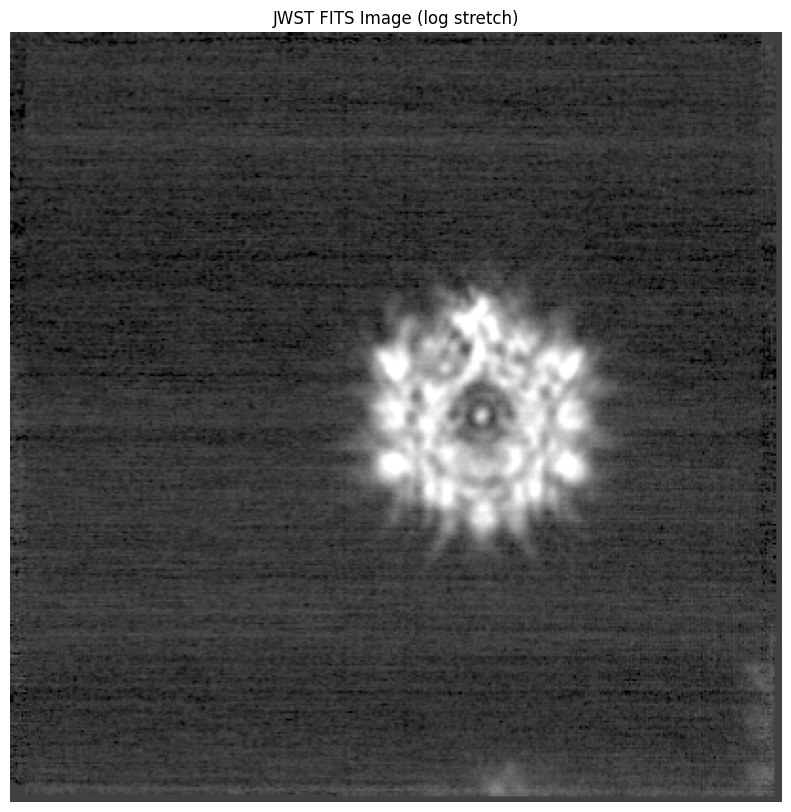

In [53]:
plt.figure(figsize=(10, 10))
plt.imshow(img2, cmap="gray", norm=norm_img)
plt.title("JWST FITS Image (log stretch)")
plt.axis("off")
plt.show()

Set DATE-AVG to '2022-09-10T08:41:48.600' from MJD-AVG.
Set DATE-END to '2022-09-10T08:42:48.726' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -9,059943 from OBSGEO-[XYZ].
Set OBSGEO-H to 1402591678,629 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


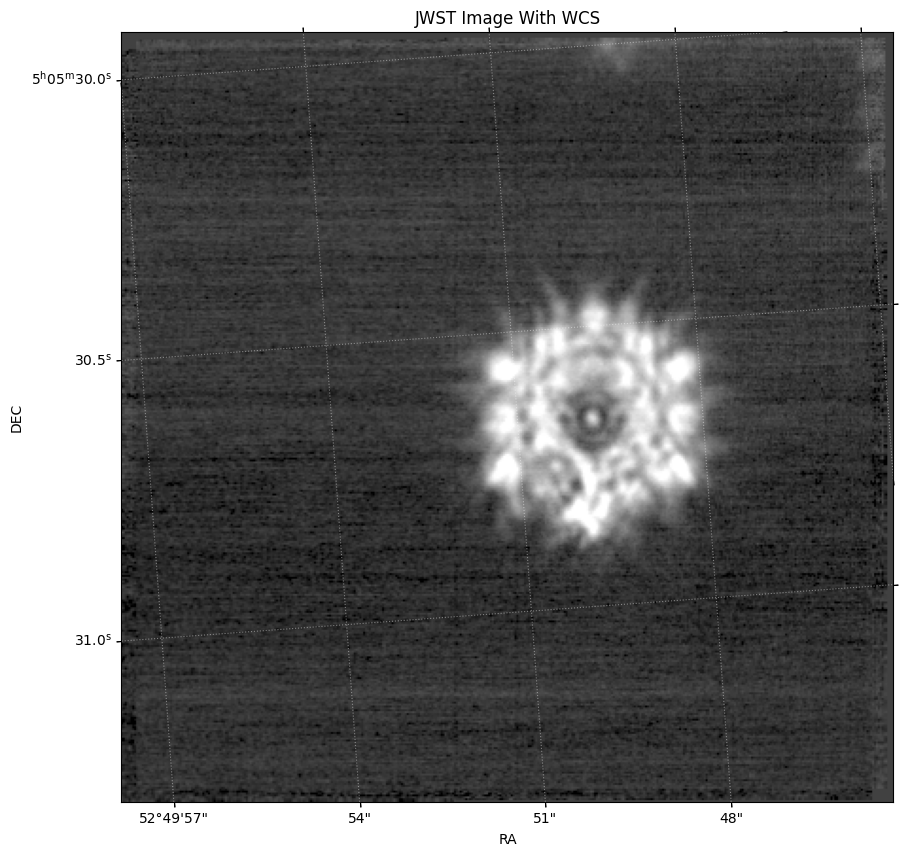

In [54]:
w = WCS(hdr)

plt.figure(figsize=(10, 10))
plt.subplot(projection=w)
plt.imshow(img2, cmap="gray", norm=norm_img)
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("JWST Image With WCS")
plt.grid(color="white", ls=":", alpha=0.4)
plt.show()